## Code zum Lesen und verarbeiten eines YUV-kodierten Bildes

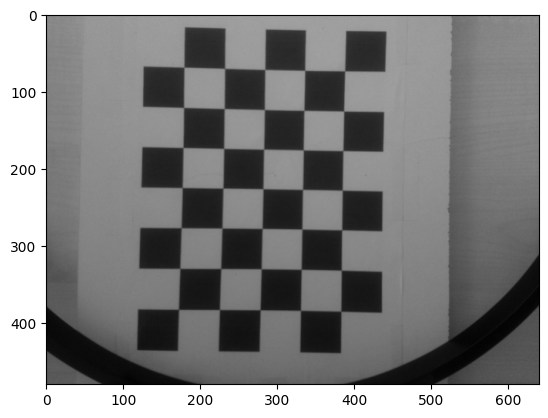

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

stream = f = open("yuv.data", "rb")
width=640
height=480

# Calculate the actual image size in the stream (accounting for rounding
# of the resolution)
fwidth = (width + 31) // 32 * 32
fheight = (height + 15) // 16 * 16

# Load the Y (luminance) data from the stream
Y = np.fromfile(stream, dtype=np.uint8, count=fwidth*fheight).\
        reshape((fheight, fwidth))

# Load the UV (chrominance) data from the stream, and double its size
U = np.fromfile(stream, dtype=np.uint8, count=(fwidth//2)*(fheight//2)).\
        reshape((fheight//2, fwidth//2)).repeat(2, axis=0).repeat(2, axis=1)

V = np.fromfile(stream, dtype=np.uint8, count=(fwidth//2)*(fheight//2)).\
        reshape((fheight//2, fwidth//2)).repeat(2, axis=0).repeat(2, axis=1)

# Stack the YUV channels together, crop the actual resolution, convert to
# floating point for later calculations, and apply the standard biases
YUV = np.dstack((Y, U, V))[:height, :width, :].astype(float)
YUV[:, :, 0]  = YUV[:, :, 0]  - 16   # Offset Y by 16
YUV[:, :, 1:] = YUV[:, :, 1:] - 128  # Offset UV by 128

# YUV conversion matrix from ITU-R BT.601 version (SDTV)
#              Y       U       V
M = np.array([[1.164,  0.000,  1.596],    # R
              [1.164, -0.392, -0.813],    # G
              [1.164,  2.017,  0.000]])   # B

# Take the dot product with the matrix to produce RGB output, clamp the
# results to byte range and convert to bytes
RGB = YUV.dot(M.T).clip(0, 255).astype(np.uint8)


plt.imshow(cv2.cvtColor(YUV[:, :, 0].astype(np.uint8), cv2.COLOR_GRAY2RGB))

plt.show()
